In [2]:
from juliacall import Main as jl
jl.seval("using Korg")
Korg = jl.Korg

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
import matplotlib.pyplot as plt
import time
import numpy as np

### Read in a linelist

In [4]:
lines = Korg.get_VALD_solar_linelist()

In [5]:
lines

41821-element Vector{Korg.Line{Float64, Float64, Float64, Float64, Float64, Float64}}:
 Fe I 3000.0414 Å (log gf = -2.96, χ = 3.3 eV)
 Fe I 3000.0639 Å (log gf = -0.96, χ = 2.43 eV)
 V I 3000.1011 Å (log gf = -0.48, χ = 1.19 eV)
 Cr II 3000.1718 Å (log gf = -1.49, χ = 3.86 eV)
 Fe I 3000.198 Å (log gf = -3.06, χ = 3.27 eV)
 Ta II 3000.2515 Å (log gf = 0.7, χ = 1.8 eV)
 Fe I 3000.2891 Å (log gf = -2.81, χ = 2.28 eV)
 Ce II 3000.3084 Å (log gf = -1.25, χ = 0.45 eV)
 Fe I 3000.3177 Å (log gf = -3.99, χ = 3.0 eV)
 Ce II 3000.3556 Å (log gf = -0.96, χ = 0.54 eV)
 ⋮
 Fe I 8987.3527 Å (log gf = -0.92, χ = 5.1 eV)
 Fe I 8989.6036 Å (log gf = -2.27, χ = 4.99 eV)
 Mg I 8991.4958 Å (log gf = -2.47, χ = 5.93 eV)
 Ti I 8991.9147 Å (log gf = -1.56, χ = 1.73 eV)
 Fe II 8992.8729 Å (log gf = -2.5, χ = 6.23 eV)
 Mg I 8994.1606 Å (log gf = -2.0, χ = 5.93 eV)
 Si I 8995.8143 Å (log gf = -2.08, χ = 6.22 eV)
 Fe I 8997.0972 Å (log gf = -3.19, χ = 3.27 eV)
 Mg I 8999.623 Å (log gf = -1.77, χ = 5.93 eV)

### Create a model atmosphere (via interpolation)

In [6]:
dwarf_atm = Korg.interpolate_marcs(5221, 4.32)

Constructing cool dwarf atmosphere interpolator.  This will only happen once per process...


### Synthesizing a spectrum

In [7]:
t = time.process_time()
sol = Korg.synthesize(dwarf_atm, lines, Korg.format_A_X(0), 4000, 4030)
time.process_time() - t

13.460042999999999

In [8]:
t = time.process_time()
sol = Korg.synthesize(dwarf_atm, lines, Korg.format_A_X(0), 5000, 5030)
time.process_time() - t

0.18130000000000024

In [9]:
sol.flux

3001-element Vector{Float64}:
 6.283557564305551e14
 6.284147886156151e14
 6.282807591384172e14
 6.282832991529332e14
 6.282891194997601e14
 6.282172319571091e14
 6.280940335777645e14
 6.273519389940028e14
 6.252138249541965e14
 6.203091247193721e14
 ⋮
 6.279031090082669e14
 6.277781635387314e14
 6.274098344488322e14
 6.264591726502655e14
 6.241966689299681e14
 6.197162120950434e14
 6.130006905248112e14
 6.057404228126938e14
 6.01819453135588e14

In [10]:
sol.wavelengths

3001-element Vector{Float64}:
 5000.0
 5000.01
 5000.02
 5000.030000000001
 5000.04
 5000.05
 5000.06
 5000.070000000001
 5000.080000000001
 5000.09
    ⋮
 5029.92
 5029.93
 5029.9400000000005
 5029.95
 5029.96
 5029.97
 5029.9800000000005
 5029.990000000001
 5030.0

In [11]:
sol.cntm

3001-element Vector{Float64}:
 6.322353334028659e14
 6.322329135672648e14
 6.322304937570945e14
 6.32228073972265e14
 6.322256542128995e14
 6.322232344790154e14
 6.322208147704891e14
 6.322183950873394e14
 6.322159754297466e14
 6.32213555797557e14
 ⋮
 6.311703132184535e14
 6.311696194735281e14
 6.311689257229382e14
 6.311682319666708e14
 6.311675382045915e14
 6.311668444367965e14
 6.311661506632055e14
 6.311654568839155e14
 6.311647630987121e14

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fm/58m7gnkn4136fj3pk0rxg0bm0000gn/T/ipykernel_44296/2887303199.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [Å]")


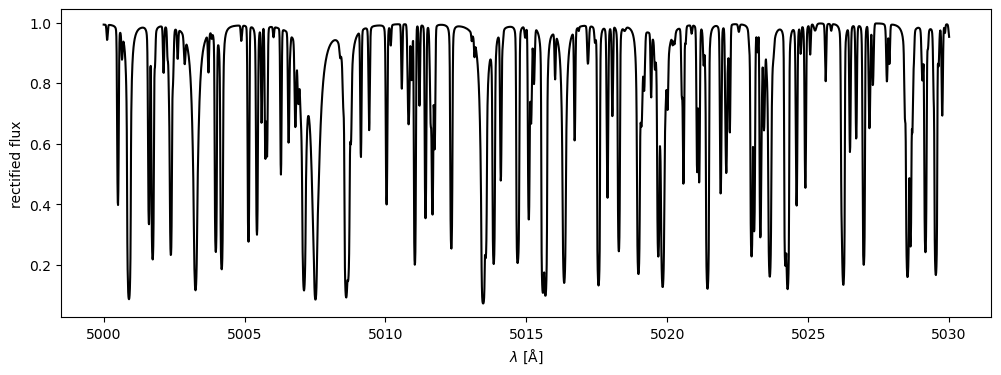

In [17]:
plt.figure(figsize = (12, 4))
plt.plot(sol.wavelengths, np.array(sol.flux) / np.array(sol.cntm), "k-")
plt.xlabel("$\lambda$ [Å]")
plt.ylabel("rectified flux");

### Specifying abundances

In [13]:
metal_poor_A_X = Korg.format_A_X(-0.5) # [M/H] =-1/2
alpha_rich_A_X = Korg.format_A_X(0, 0.5) # all [M/H] = 0, but [alpha/H] = 0.5
Ni_enriched_A_X = Korg.format_A_X({"Ni": 1.0}) # all [M/H] = 0, except [Ni/H] = 1.0

<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fm/58m7gnkn4136fj3pk0rxg0bm0000gn/T/ipykernel_44296/1353783491.py:15: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [Å]")
/var/folders/fm/58m7gnkn4136fj3pk0rxg0bm0000gn/T/ipykernel_44296/1353783491.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$F_\lambda/R_\mathrm{star}^2$ [erg s$^{-1}$ cm$^{-5}$]")


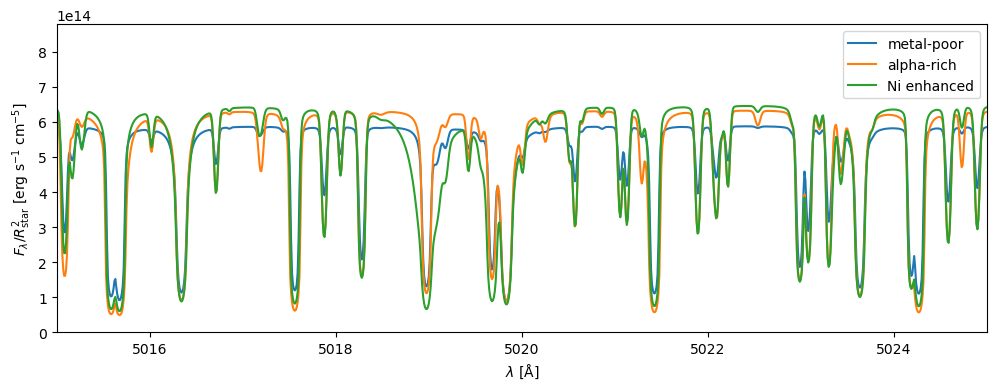

In [14]:
metal_poor_atm = Korg.interpolate_marcs(5221, 4.32, metal_poor_A_X)
metal_poor_sol = Korg.synthesize(metal_poor_atm, lines, metal_poor_A_X, 5015, 5025)

alpha_rich_sol = Korg.interpolate_marcs(5221, 4.32, alpha_rich_A_X)
alpha_rich_sol = Korg.synthesize(alpha_rich_sol, lines, alpha_rich_A_X, 5015, 5025)

Ni_enriched_atm = Korg.interpolate_marcs(5221, 4.32, Ni_enriched_A_X)
Ni_enriched_sol = Korg.synthesize(Ni_enriched_atm, lines, Ni_enriched_A_X, 5015, 5025)

plt.figure(figsize=(12, 4))
plt.plot(metal_poor_sol.wavelengths, metal_poor_sol.flux, label="metal-poor")
plt.plot(alpha_rich_sol.wavelengths, alpha_rich_sol.flux, label="alpha-rich")
plt.plot(Ni_enriched_sol.wavelengths, Ni_enriched_sol.flux, label="Ni enhanced")

plt.xlabel("$\lambda$ [Å]")
plt.ylabel("$F_\lambda/R_\mathrm{star}^2$ [erg s$^{-1}$ cm$^{-5}$]")
plt.xlim(5015, 5025)
plt.ylim(0, plt.ylim()[1]*1.3) # make a little room on top for the legend
plt.legend();

### Other data returned by `synthesize`

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fm/58m7gnkn4136fj3pk0rxg0bm0000gn/T/ipykernel_44296/3419548422.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$ [Å]")


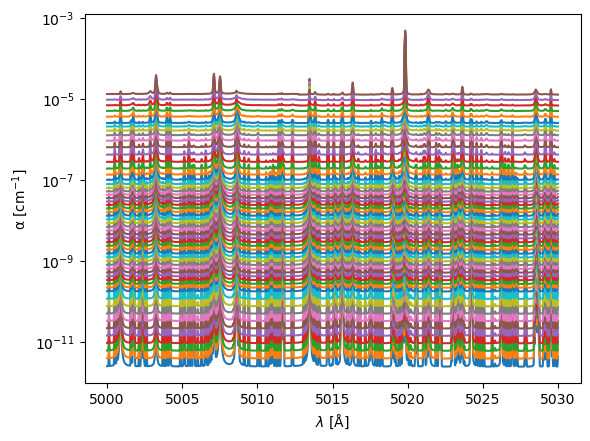

In [16]:
plt.plot(sol.wavelengths, np.array(sol.alpha).transpose())
plt.yscale("log")
plt.xlabel("$\lambda$ [Å]")
plt.ylabel("α [cm$^{-1}$]");

The strings represent different species from Korg.Species to construct a Species object

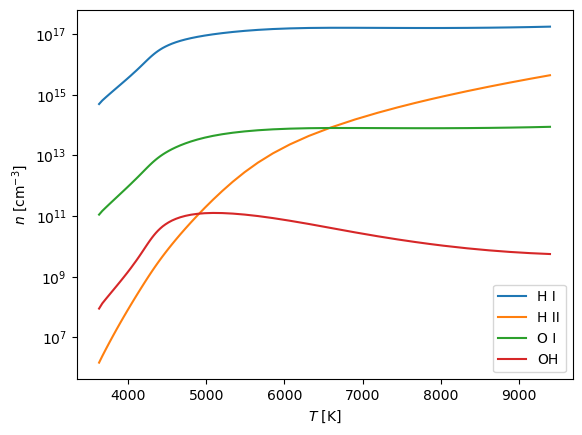

In [18]:
temps = Korg.get_temps(dwarf_atm)

for spec in ["H I", "H II", "O I", "OH"]:
    plt.plot(temps, sol.number_densities[Korg.Species(spec)], label = spec)
    
plt.legend()
plt.yscale("log")
plt.xlabel("$T$ [K]")
plt.ylabel("$n$ [cm$^{-3}$]");